In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
timeseries = pd.date_range("11:00", "23:00", freq="1s")

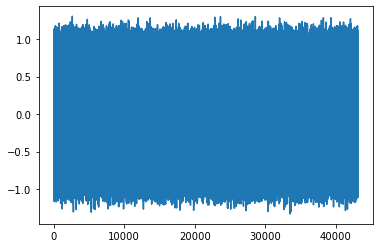

In [3]:
import matplotlib.pyplot as pl
import numpy as np

x = np.linspace(1, len(timeseries), num=len(timeseries))

def f(x):
    return np.sin(x) + np.random.normal(scale=0.1, size=len(x))

pl.plot(x, f(x))


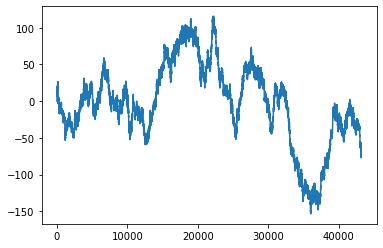

In [24]:
def f(x):
    y = 0
    result = []
    for _ in x:
        result.append(y)
        y += np.random.normal(scale=1)
    return np.array(result)
I = f(x)
pl.plot(x, I)

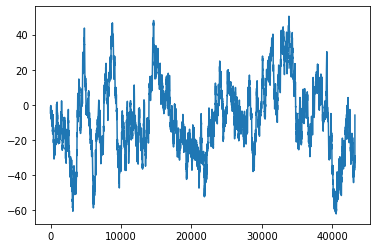

In [25]:
def runningMean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

# x = np.linspace(0, 1000, 1000)
y = runningMean(f(x), 5)
pl.plot(x, y)

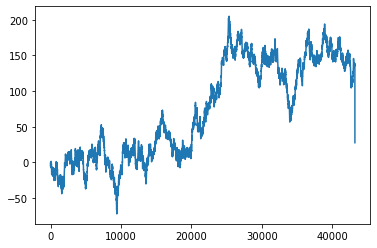

In [26]:
def runningMean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]
# x = np.linspace(0, 1000, 1000)
y = runningMean(f(x), 5)
pl.plot(x, y)

In [27]:
df_I = pd.DataFrame({"timestamp": timeseries, "value":I})
df_I['unit']="current"

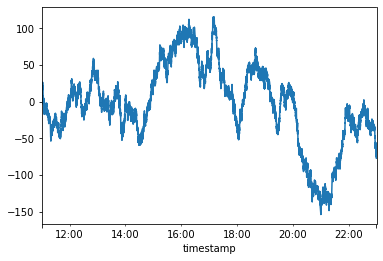

In [28]:
df_I.set_index("timestamp").value.plot()

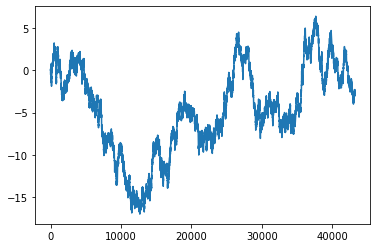

In [29]:
t = f(x)
pl.plot(x, t/10)

In [30]:
df_t = pd.DataFrame({"timestamp": timeseries, "value":t/10})
df_t["unit"] = "deg C"

In [31]:
# https://www.allaboutcircuits.com/textbook/direct-current/chpt-12/temperature-coefficient-resistance/
# http://hyperphysics.phy-astr.gsu.edu/hbase/electric/restmp.html
r = 15*(1-0.003847*(t-20))
v = I*r

In [33]:
df_v = pd.DataFrame({"timestamp": timeseries, "value":v})
df_v["unit"] = "voltage"

df_v.value.plot()

In [35]:
df = pd.concat([df_I, df_t, df_v]).sort_values("timestamp")

df.to_csv("./data/circuit.csv")

df.to_parquet("./data/circuit.parquet.snappy")